In [2]:
import numpy as np
import pandas as pd
import sklearn
print(sklearn.__version__)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, RFE
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD


1.4.1.post1


In [3]:
#Cargar dataset
df = pd.read_csv('DatasetRelleno.csv', encoding="utf-8")

In [4]:
# Separar las columnas de características y etiquetas
X = df[['Clean_Resume', 'Common Skills']]
y = df['Category']

# Obtener el tipo de datos de una columna específica
print(df['Clean_Resume'].dtype)

# Convertir las columnas de características a texto
X['Clean_Resume'] = X['Clean_Resume'].astype(str)
X['Common Skills'] = X['Common Skills'].astype(str)

# Obtener el tipo de datos de una columna específica
print(df['Clean_Resume'].dtype)

# Aplicar TfidfVectorizer a las columnas de características
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X['Clean_Resume'] + ' ' + X['Common Skills'])

X_tfidf

object
object


C:\Users\pepeh\AppData\Local\Temp\ipykernel_26916\1231302508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clean_Resume'] = X['Clean_Resume'].astype(str)
C:\Users\pepeh\AppData\Local\Temp\ipykernel_26916\1231302508.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Common Skills'] = X['Common Skills'].astype(str)


<1052x14678 sparse matrix of type '<class 'numpy.float64'>'
	with 194773 stored elements in Compressed Sparse Row format>

In [5]:
# Divide el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25)

In [6]:
# Selecciona características con chi-squared test
'''chi2_scores = chi2(X_train, y_train)
top_features_chi2 = np.argsort(chi2_scores[0])[-10:] #[1] obtener los valores de chi-cuadrado, [0] contiene los valores p(p =  indica la hipotesis 0.05 <)'''

'chi2_scores = chi2(X_train, y_train)\ntop_features_chi2 = np.argsort(chi2_scores[0])[-10:] #[1] obtener los valores de chi-cuadrado, [0] contiene los valores p(p =  indica la hipotesis 0.05 <)'

In [6]:
# Convertir datos dispersos a matriz densa
X_train_dense = X_train.toarray()

mi_scores = []

# Calcular la MI para cada característica
for feature in X_train_dense.T:
    mi_scores.append(mutual_info_score(feature, y_train))

mi_scores = np.array(mi_scores)
top_features_mi = np.argsort(mi_scores)[-50:]

c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for la

In [6]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calcular las puntuaciones de MI para cada característica
mi_scores = mutual_info_classif(X_train, y_train)

# Convertir las puntuaciones de MI en un array de NumPy, si no lo son ya
mi_scores = np.array(mi_scores)

# Establecer un umbral de MI - esto podría ser, por ejemplo, la media de las puntuaciones de MI
mi_threshold = np.mean(mi_scores)

# Crear un vector booleano para las características que superan el umbral
mi_features = mi_scores > mi_threshold

# Seleccionar las características de tus conjuntos de entrenamiento y prueba
X_train_selected = X_train[:, mi_features]
X_test_selected = X_test[:, mi_features]

c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for la

In [ ]:
# Selecciona características con RFE
'''selector = RFE(estimator=SVC(kernel="linear"), n_features_to_select=10)
selector.fit(X_train, y_train)
top_features_rfe = selector.support_
print(selector.ranking_)'''


In [7]:
# Imprime las características seleccionadas
#print(f"Top features chi2: {top_features_chi2}")
print(f"Top features mutual information: {top_features_mi}")
#print(f"Top features RFE: {top_features_rfe}")

Top features mutual information: [ 9848 11082  9755 13301  7813   451  3306   891  8694  8345 10175 14388
  4380   861 12985 10987 13608  7271  4384 11085  2689  8561 11020 13083
 11812  1384   746  6384 13218 13095  5198  6848 13686 10433  6869  6035
 14242  3634 13004 11794 12161  9199  3305 12047  7791 12856 12372  3645
  3578 11676]


In [8]:
# Aplicar esta selección a tus conjuntos de datos
X_train_selected = X_train[:, top_features_mi]
X_test_selected = X_test[:, top_features_mi]
X_train_selected

<789x50 sparse matrix of type '<class 'numpy.float64'>'
	with 15529 stored elements in Compressed Sparse Row format>

In [8]:
# Paso 1: Estandarizar los datos
# Es importante estandarizar los datos antes de aplicar PCA para asegurar que cada característica contribuya equitativamente
scaler = StandardScaler(with_mean=False)
X_standardized = scaler.fit_transform(X_train_selected)

In [9]:
# Inicializa y ajusta TruncatedSVD
# Puedes especificar el número de componentes que desees con el parámetro n_components
svd = TruncatedSVD(n_components=15, random_state=42)
X_train_reduced = svd.fit_transform(X_train_selected)


# Luego puedes transformar tu conjunto de prueba con el mismo ajuste
X_test_reduced = svd.transform(X_test_selected)

In [10]:
# Calcular la varianza explicada acumulativa
varianza_explicada_cumulativa = np.cumsum(svd.explained_variance_ratio_)

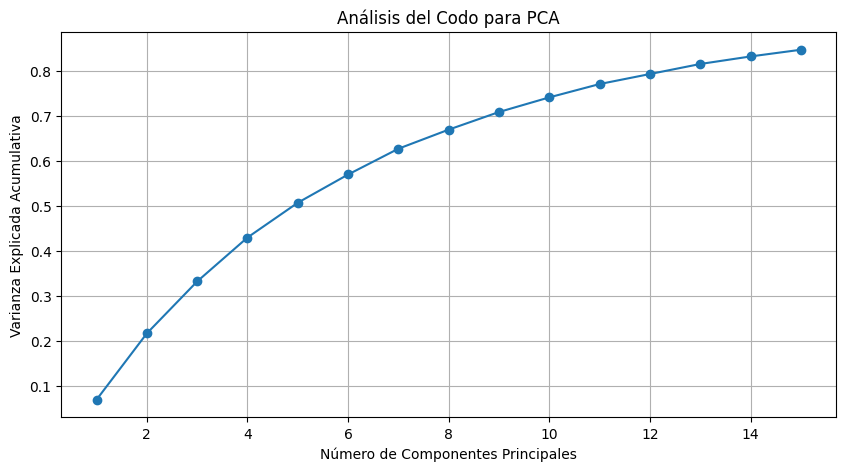

In [11]:
# Graficar la varianza explicada acumulativa
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_explicada_cumulativa)+1), varianza_explicada_cumulativa, marker='o', linestyle='-')
plt.title('Análisis del Codo para PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()

MODELO PROVICIONAL


In [12]:
from sklearn.svm import SVC

In [13]:
svm_model = SVC(kernel='linear', random_state=42)

In [15]:
svm_model.fit(X_train_reduced, y_train)

SVC(kernel='linear', random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_reduced)

# Imprimir un reporte de clasificación
print(classification_report(y_test, y_pred))

# Opcional: Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

                           precision    recall  f1-score   support

               Blockchain       0.00      0.00      0.00        22
             Data Science       0.90      0.68      0.78        28
                 Database       1.00      1.00      1.00        20
          DevOps Engineer       0.89      0.71      0.79        24
         DotNet Developer       1.00      0.89      0.94        19
           Java Developer       0.57      0.35      0.44        34
Network Security Engineer       0.94      0.94      0.94        31
         Python Developer       0.32      0.89      0.48        28
                  Testing       1.00      1.00      1.00        35
            Web Designing       1.00      1.00      1.00        22

                 accuracy                           0.75       263
                macro avg       0.76      0.75      0.74       263
             weighted avg       0.76      0.75      0.73       263

[[ 0  0  0  0  0  2  0 20  0  0]
 [ 0 19  0  0  0  0  0  9 

c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [15]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Instanciar el Grid Search
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=2, cv=5)

# Ejecutar el grid search
grid_search.fit(X_train_reduced, y_train)

# Encontrar los mejores hiperparámetros
print(grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1